Домашнее задание
Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
Разделите данные на выборку для обучения и тестирования
Постройте модель LDA
Визуализируйте предсказания для тестовой выборки и центры классов
Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [3]:
import  matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_iris
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})

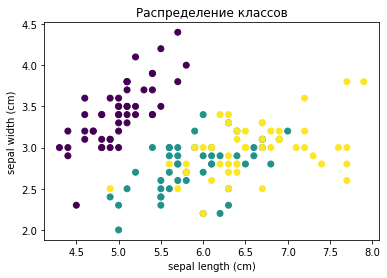

In [6]:
# Отображение классификации объектов
plt.cm.register_cmap(cmap=cmap)
iris = load_iris()
variety = iris.target
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=variety)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Распределение классов')
plt.show()

In [7]:
# Строим модель линейно-дискриминантного анализа
x_train, x_test, y_train, y_test = train_test_split(df, variety, test_size=0.33, random_state=42)
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_predict = lda.predict(x_test)
# Результат предсказания модели
result = pd.DataFrame([y_test, y_predict]).T
print(result)

    0  1
0   1  1
1   0  0
2   2  2
3   1  1
4   1  1
5   0  0
6   1  1
7   2  2
8   1  1
9   1  1
10  2  2
11  0  0
12  0  0
13  0  0
14  0  0
15  1  1
16  2  2
17  1  1
18  1  1
19  2  2
20  0  0
21  2  2
22  0  0
23  2  2
24  2  2
25  2  2
26  2  2
27  2  2
28  0  0
29  0  0
30  0  0
31  0  0
32  1  1
33  0  0
34  0  0
35  2  2
36  1  1
37  0  0
38  0  0
39  0  0
40  2  2
41  1  1
42  1  1
43  0  0
44  0  0
45  1  1
46  2  1
47  2  2
48  1  1
49  2  2


In [8]:
# Точность предсказания
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

0.98


In [9]:
# Коэффициенты дискриминантных линий
print(lda.coef_)

[[  6.04352754  15.93954005 -17.70703221 -20.4326598 ]
 [ -1.49012528  -4.92609327   4.40433335   2.48974879]
 [ -3.97632262  -9.46213168  11.61077445  16.06680135]]


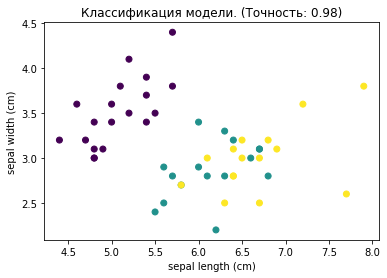

In [10]:
# Визуализация результатов предсказания
plt.scatter(x_test['sepal length (cm)'], x_test['sepal width (cm)'], c=y_predict)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title(f'Классификация модели. (Точность: {accuracy})')
plt.show()

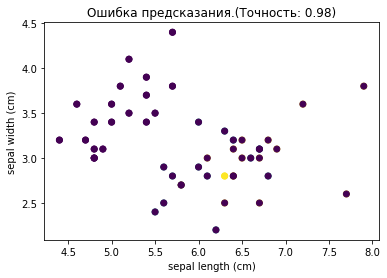

In [11]:
# Визуализация ошибки предсказания
plt.title(f'Ошибка предсказания.(Точность: {accuracy})')
plt.scatter(x_test['sepal length (cm)'], x_test['sepal width (cm)'], c=y_test)
plt.scatter(x_test['sepal length (cm)'], x_test['sepal width (cm)'], c=abs(y_predict - y_test))
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

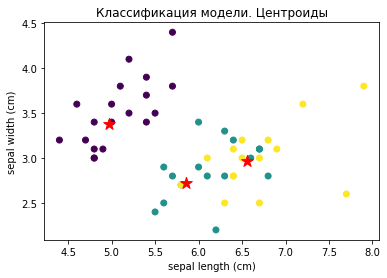

In [12]:
# Визуализация центроидов
plt.scatter(x_test['sepal length (cm)'], x_test['sepal width (cm)'], c=y_predict)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title(f'Классификация модели. Центроиды')
centers = lda.means_
plt.scatter(centers[:, 0], centers[:, 1], c='r', s=150, marker='*')
plt.show()

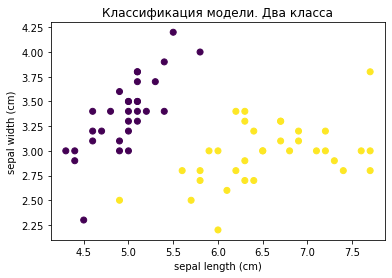

In [13]:
sx_train = x_train[(y_train == 0) | (y_train == 2)]
sx_train = sx_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
sx_test = x_test[(y_test == 0) | (y_test == 2)]
sx_test = sx_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]
plt.scatter(sx_train['sepal length (cm)'], sx_train['sepal width (cm)'], c=sy_train)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title(f'Классификация модели. Два класса')
plt.show()

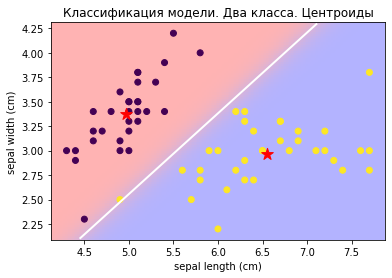

In [14]:
# Строим визуализацию с центроидами и окрашиванием областей
slda = LinearDiscriminantAnalysis()
slda.fit(sx_train, sy_train)
scentroids = slda.means_
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title(f'Классификация модели. Два класса. Центроиды')
plt.scatter(sx_train['sepal length (cm)'], sx_train['sepal width (cm)'], c=sy_train)
plt.scatter(scentroids[:, 0], scentroids[:, 1], s=150, c='r', marker='*')
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
Z = slda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes', shading='auto', zorder=-1)
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')
plt.show()

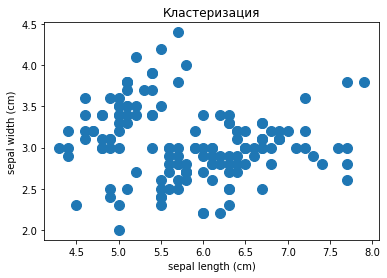

In [15]:
# Кластеризация
x = df[['sepal length (cm)', 'sepal width (cm)']]
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title(f'Кластеризация')
plt.scatter(x['sepal length (cm)'], x['sepal width (cm)'], s=100, cmap='autumn')
plt.show()

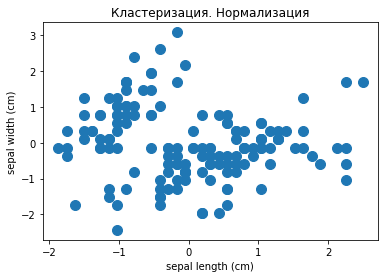

In [16]:
# Нормализуем
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title(f'Кластеризация. Нормализация')
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], s=100, cmap='autumn')
plt.show()

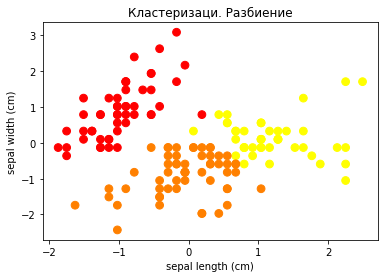

In [17]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(x_scaled)
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], cmap='autumn', c=clusters, s=60)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title(f'Кластеризаци. Разбиение')
plt.show()

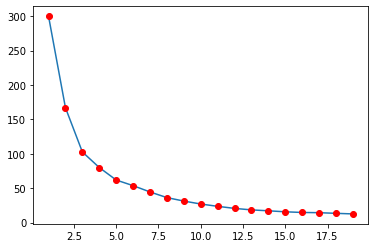

In [18]:
# Строим график локтя
inertias_list = []
ks = range(1, 20)
for i in ks:
    kmean = KMeans(n_clusters=i)
    cluster = kmean.fit_predict(x_scaled)
    inertias_list.append(kmean.inertia_)
plt.plot(ks, inertias_list)
plt.plot(ks, inertias_list, 'ro')
plt.show()

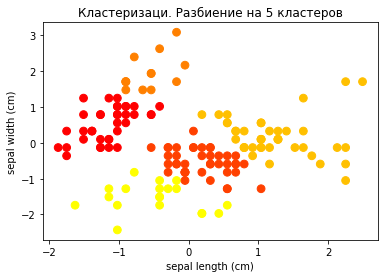

In [19]:
# Строим кластеризацию на основе например 5 кластеров
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(x_scaled)
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], cmap='autumn', c=clusters, s=60)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title(f'Кластеризаци. Разбиение на 5 кластеров')
plt.show()

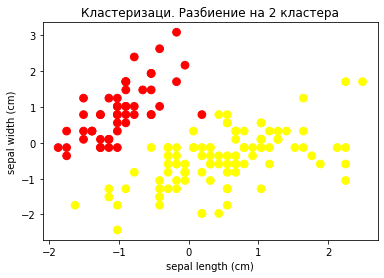

In [20]:
# Но самым оптимальным будет разбиение на 2 кластера
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(x_scaled)
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], cmap='autumn', c=clusters, s=60)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title(f'Кластеризаци. Разбиение на 2 кластера')
plt.show()